# Introduction
Initially introduced to assess the abilities of students [(Cambridge, 2008)](https://www.cambridgeassessment.org.uk/news/how-have-school-exams-changed-over-the-past-150-years/#:~:text=The%20first%20public%20examinations%20for,local), exams have come to serve a wider purpose in recent years to encompass the assessment of the teaching quality provided by teachers and the school. From the prospective of students, exams are a frequent point of discussion as they raise issues on the utility of exams in assessing the abilities of students [(OpenDoor, 2021)](https://www.opendooreducation.in/blog/the-problem-is-not-the-exams-the-problem-is-the-questions-in-the-exams) to grade inflation [(The Observer, 2021)](https://www.theguardian.com/commentisfree/2021/aug/15/lets-not-return-to-flawed-exams-we-have-better-ways-to-assess-our-children). 

In addition as the book, Naked Statistics by Charles Wheelan highlights, the use of exams to assess the performance of teachers and schools have lead to issues of conflict of interest and collusion as teachers strive to ensure students achieve high exam scores. This is exemplified. perhaps best, by the investigation into the Louisiana Prep school [(The New York Times, 2018)](https://youtu.be/LRewodHw-8E). 



In [1]:
#exclude warning
import warnings
warnings.filterwarnings("ignore", message="Consider using IPython.display.IFrame instead")

#import library 
from IPython.display import HTML

#inbed video
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/LRewodHw-8E" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

Leaving a side the other issues concerning exams and this effectivity to assess a student's capability, such collusions by teachers must be identified and investigated with action taken if proven to be true. There are a myriad of ways this can be done including relying on whistle-blower to notify authorities of such conduct. However, machine learning can also be used to identify possible questionable exam results such as the use of unsupervised learning or anomaly detection, specifically KMeans and Isolation Forest. 

Subsequently, using an exam results dataset available on Kaggle [(Seshapanpu, 2019)](https://www.kaggle.com/datasets/spscientist/students-performance-in-exams), this project will aim to identify anomalies. It should be emphasised that these highlight candidates whose results appear as anomalies. This does not instantaneously correspondence to improper deeds but aim to highlight groups that require further investigation, cutting down to a large population to a manageable sample size. 

# Overview
The dataset for this project involves test results for 1000 students with information on how they scored on reading, writing and maths, along with key information about the student. It has no null values and is relatively clean. 

In [2]:
# import libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# library for importing dataset from kaggle
import os

#libraries for visualisation 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# import dataset 
df = pd.read_csv("/kaggle/input/students-performance-in-exams/exams.csv")

#view top 5 rows
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


In [3]:
# view information on dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


The distribution of the data is as follows: 

## Gender
The gender balance in the dataset is relatively even with 1.7% skew in favour of males and is similar to the global estimates of gender ratios ([The World Bank, 2019](https://data.worldbank.org/indicator/SP.POP.TOTL.FE.ZS)). 

The combination of the three exam results is as follows: 

In [4]:
print("% of males in dataset -", (df[df["gender"]=="male"].shape[0]/df.shape[0])*100)

% of males in dataset - 51.7


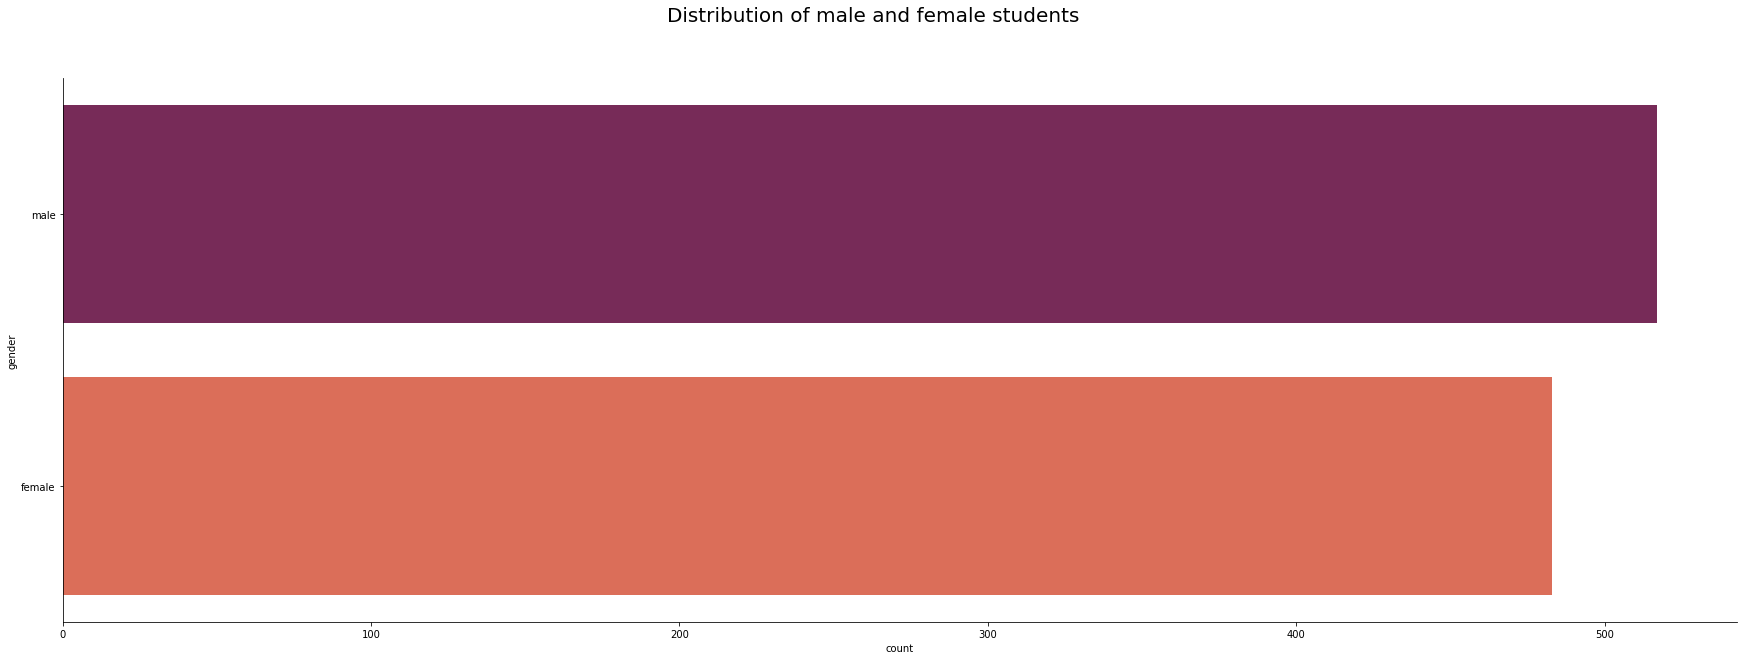

In [5]:
#create graph
plt.figure(figsize= (30,10))
sns.countplot(y= "gender", data = df, palette = "rocket")

sns.despine(top = True, right = True, left = False, bottom = False)


plt.suptitle("Distribution of male and female students", fontsize = 20)
plt.show()

It highlights that typically women outperformed males in exams. This is a trend seen in the wider world as one source highlights: 
> "The A-grade attainment for girls at Higher was 52.1 per cent, against 42.2 per cent for boys, resulting in a gap of 9.9 percentage points." ([Tes magazine, 2021](https://www.tes.com/magazine/teaching-learning/general/exam-grades-gender-gap-grows-how-close-it)) 

In [6]:
# create graph
fig = px.scatter_3d(df, x = "math score", y = "reading score", z ="writing score", color = "gender", template  = "plotly_white",opacity=0.5, size_max=18,color_discrete_sequence=px.colors.qualitative.D3)

# format graph
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

## Race/Ethnicity 
Drawing insights and assumptions based on ethnicity is limited as the data is animalised and uses group A to E. 

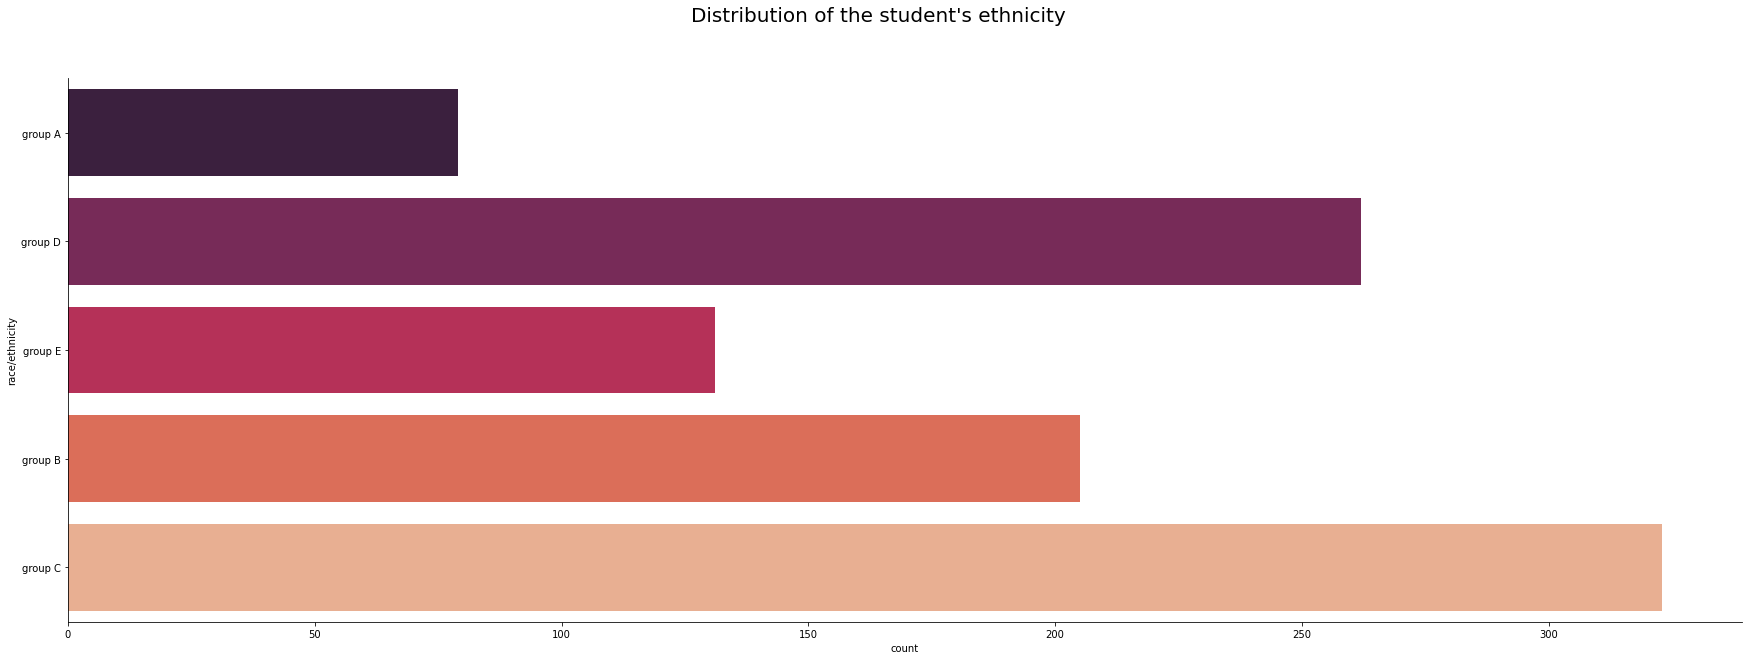

In [7]:
#create graph
plt.figure(figsize= (30,10))
sns.countplot(y= "race/ethnicity", data = df, palette = "rocket")

sns.despine(top = True, right = True, left = False, bottom = False)
plt.suptitle("Distribution of the student's ethnicity", fontsize = 20)

plt.show()

It appears that looking at how the each exam scores are distributed separated by race highlights that specific groups out performed others. Group B and C appear to particularly scored low. This may be due to disadvantages faced by such groups and social dynamics may need to be examined to understand underlying factors related to this distribution. 

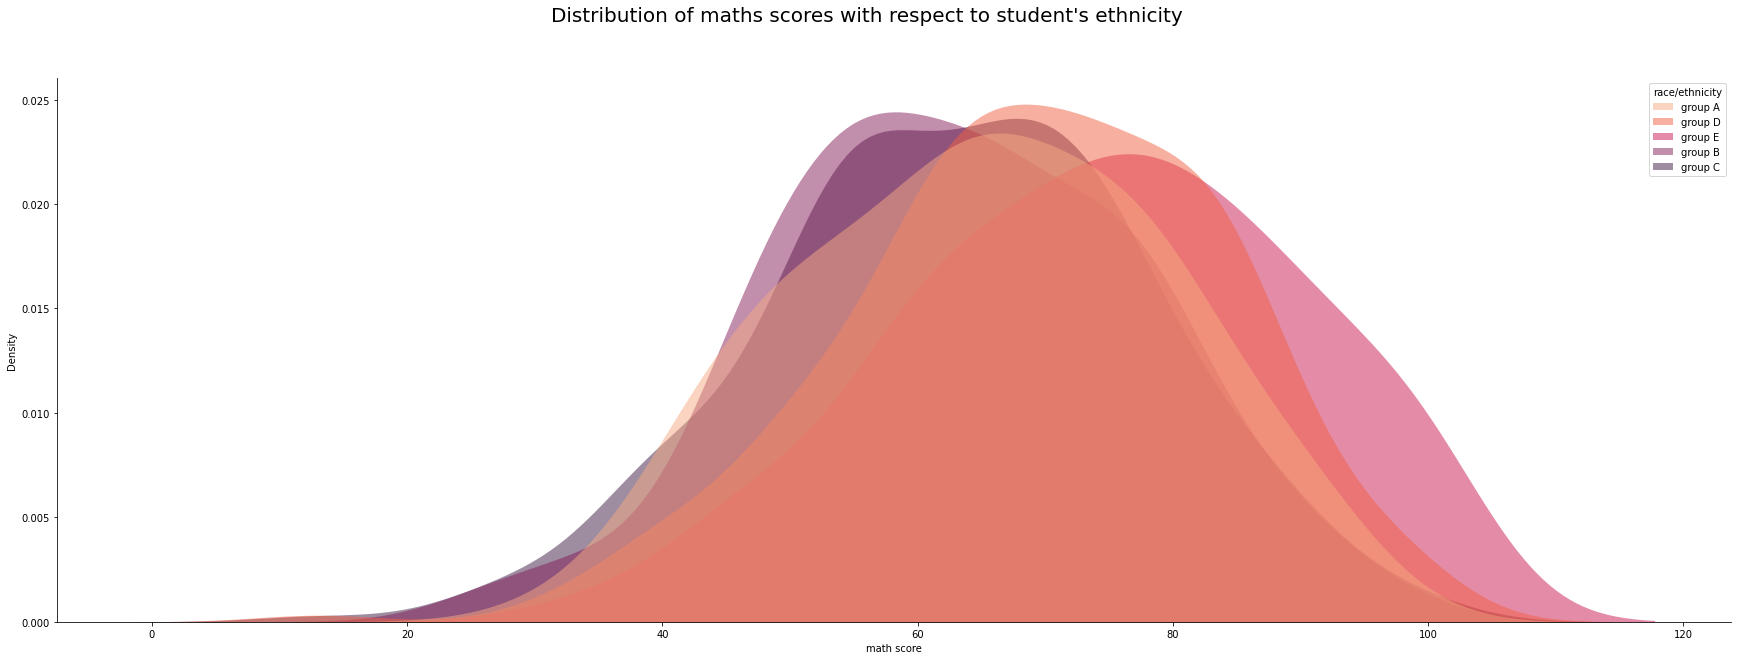

In [8]:

#create graph
plt.figure(figsize= (30,10))
sns.kdeplot(x ="math score", data = df, hue ="race/ethnicity",  fill=True, common_norm=False,palette = "rocket_r",
   alpha=.5, linewidth=0,)

sns.despine(top = True, right = True, left = False, bottom = False)
plt.suptitle("Distribution of maths scores with respect to student's ethnicity", fontsize = 20)

plt.show()

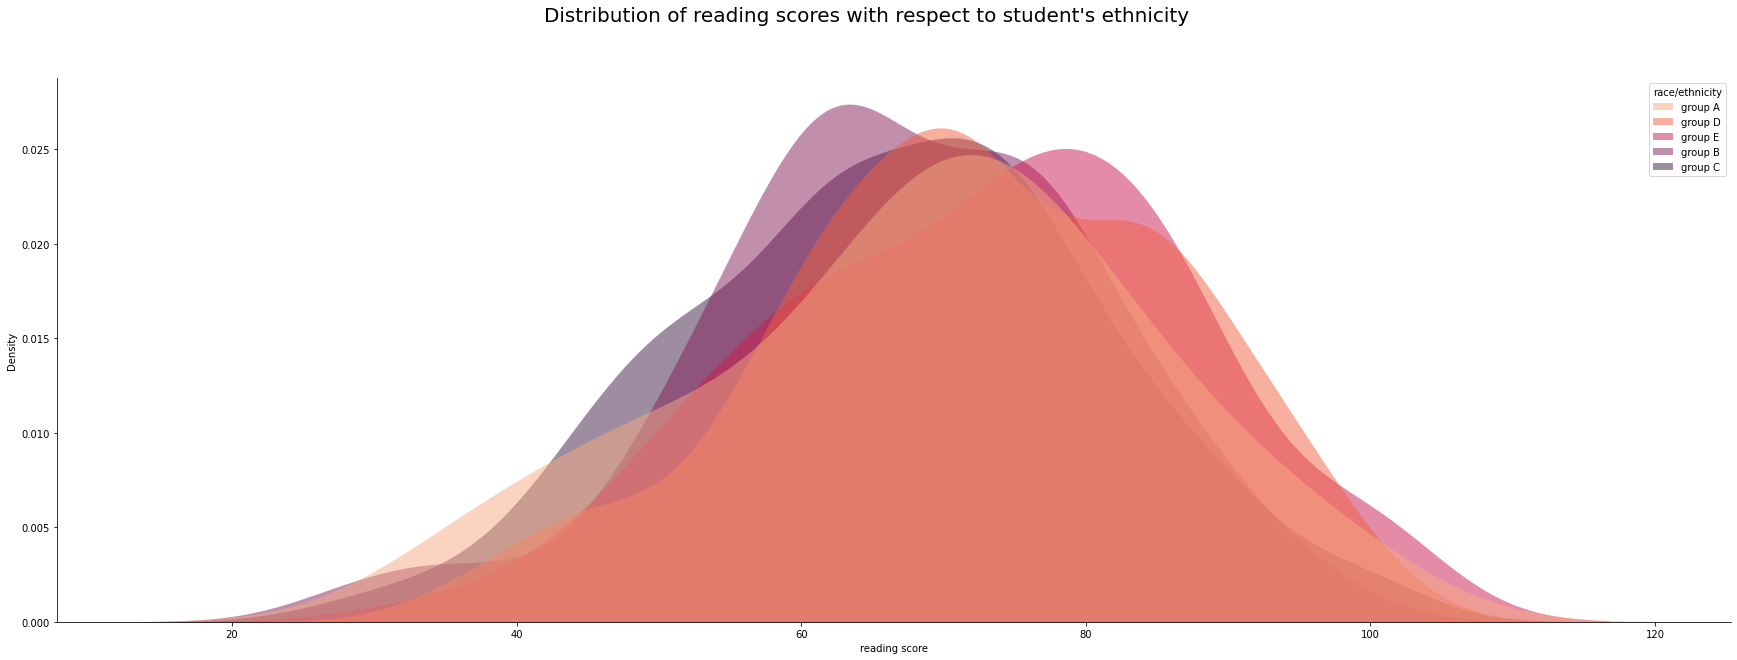

In [9]:
#create graph
plt.figure(figsize= (30,10))
sns.kdeplot(x ="reading score", data = df, hue ="race/ethnicity",  fill=True, common_norm=False, palette = "rocket_r",
   alpha=.5, linewidth=0,)

sns.despine(top = True, right = True, left = False, bottom = False)
plt.suptitle("Distribution of reading scores with respect to student's ethnicity", fontsize = 20)

plt.show()

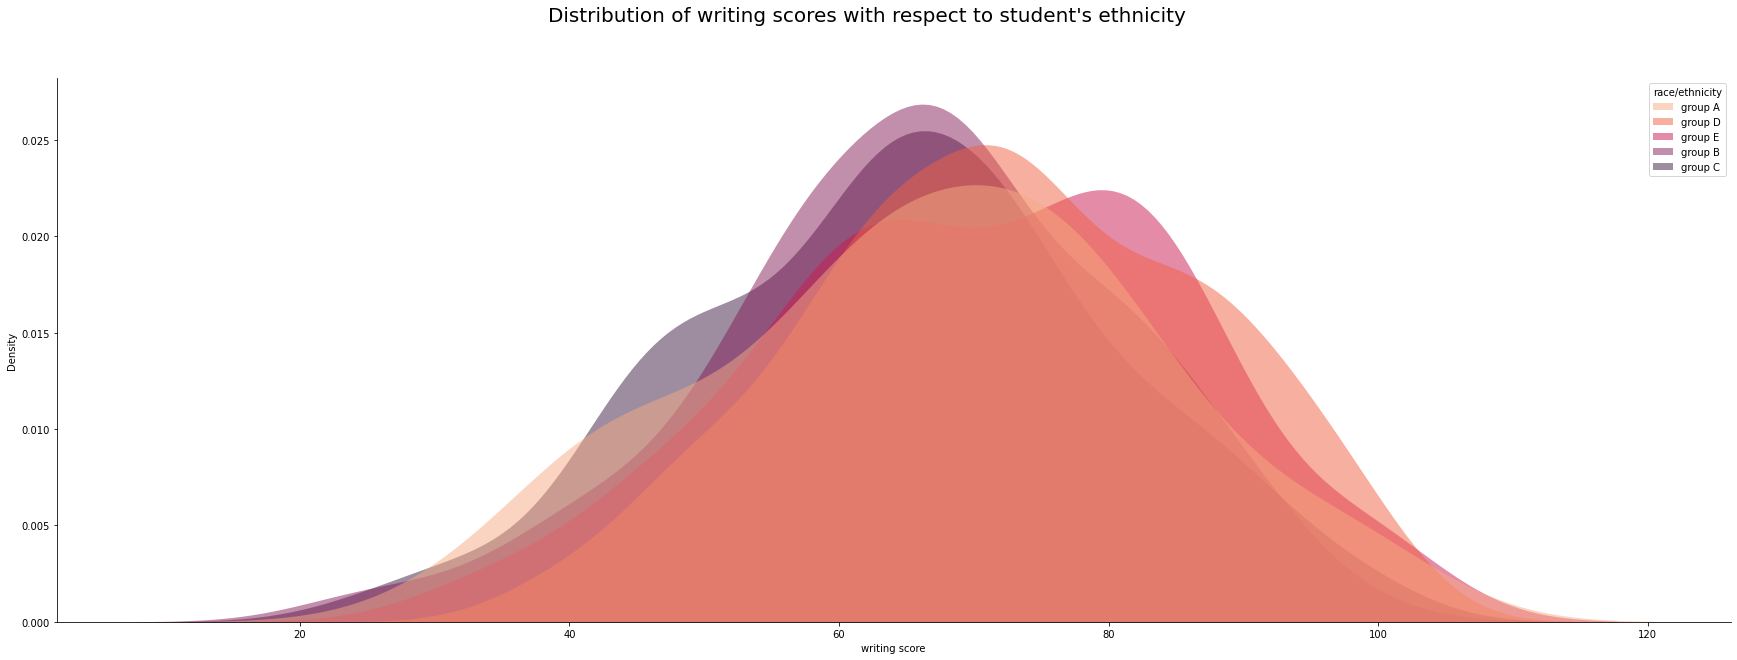

In [10]:
#create graph
plt.figure(figsize= (30,10))
sns.kdeplot(x ="writing score", data = df, hue ="race/ethnicity",  fill=True, common_norm=False, palette = "rocket_r",
   alpha=.5, linewidth=0,)

sns.despine(top = True, right = True, left = False, bottom = False)
plt.suptitle("Distribution of writing scores with respect to student's ethnicity", fontsize = 20)

plt.show()

In [11]:
# create graph
fig = px.scatter_3d(df, x = "math score", y = "reading score", z ="writing score", color = "race/ethnicity", template  = "plotly_white",opacity=0.5, size_max=18,color_discrete_sequence=px.colors.qualitative.D3)

# format graph
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

## Parental level of education
There is significant variation in the level of parental education as some have parents with some or limited to high school education, whilst others have higher education including masters. 

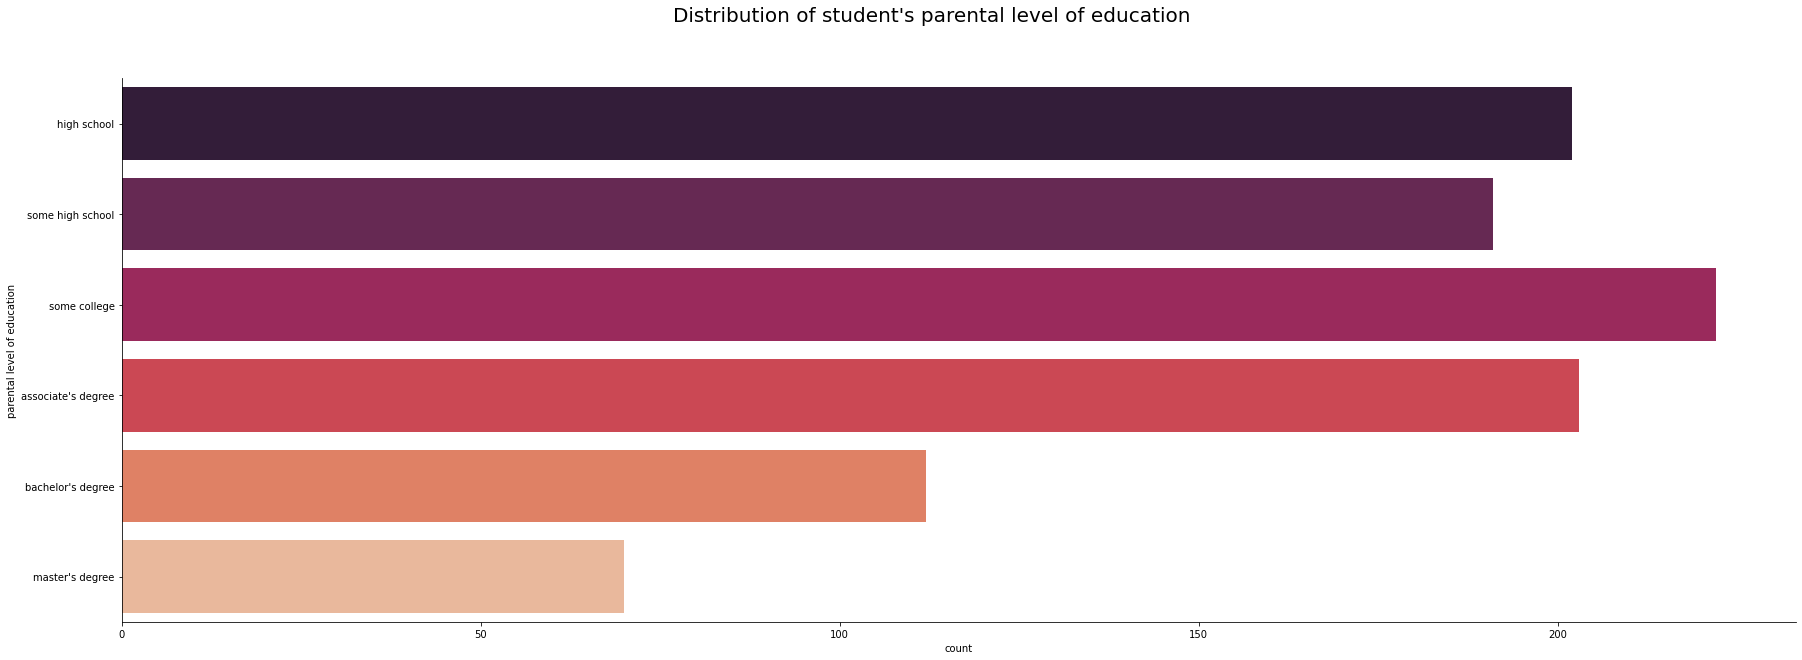

In [12]:
#create graph
plt.figure(figsize= (30,10))
sns.countplot(y= "parental level of education", data = df, palette = "rocket")

sns.despine(top = True, right = True, left = False, bottom = False)
plt.suptitle("Distribution of student's parental level of education", fontsize = 20)
plt.show()

These results are reflected in the students and their exam results as those whose parents had masters and bachelors consistently out performed those who had some high school education. There are a broad array of reasons for this including outlook to education as well as poverty limiting the parents ability to support their children in their academic endeavours.  

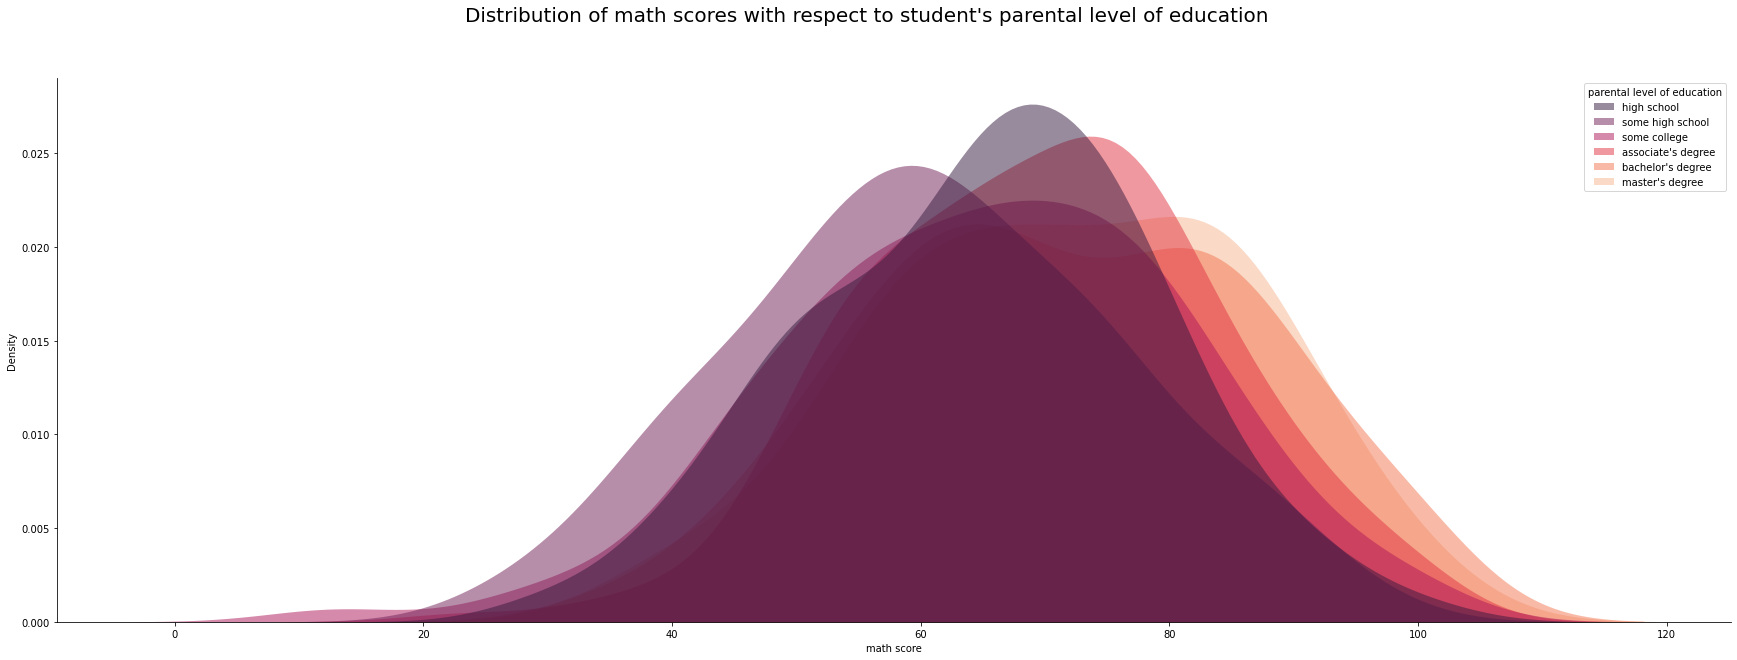

In [13]:
#create graph
plt.figure(figsize= (30,10))
sns.kdeplot(x ="math score", data = df, hue ="parental level of education",  fill=True, common_norm=False, palette = "rocket",
   alpha=.5, linewidth=0,)

sns.despine(top = True, right = True, left = False, bottom = False)
plt.suptitle("Distribution of math scores with respect to student's parental level of education", fontsize = 20)

plt.show()

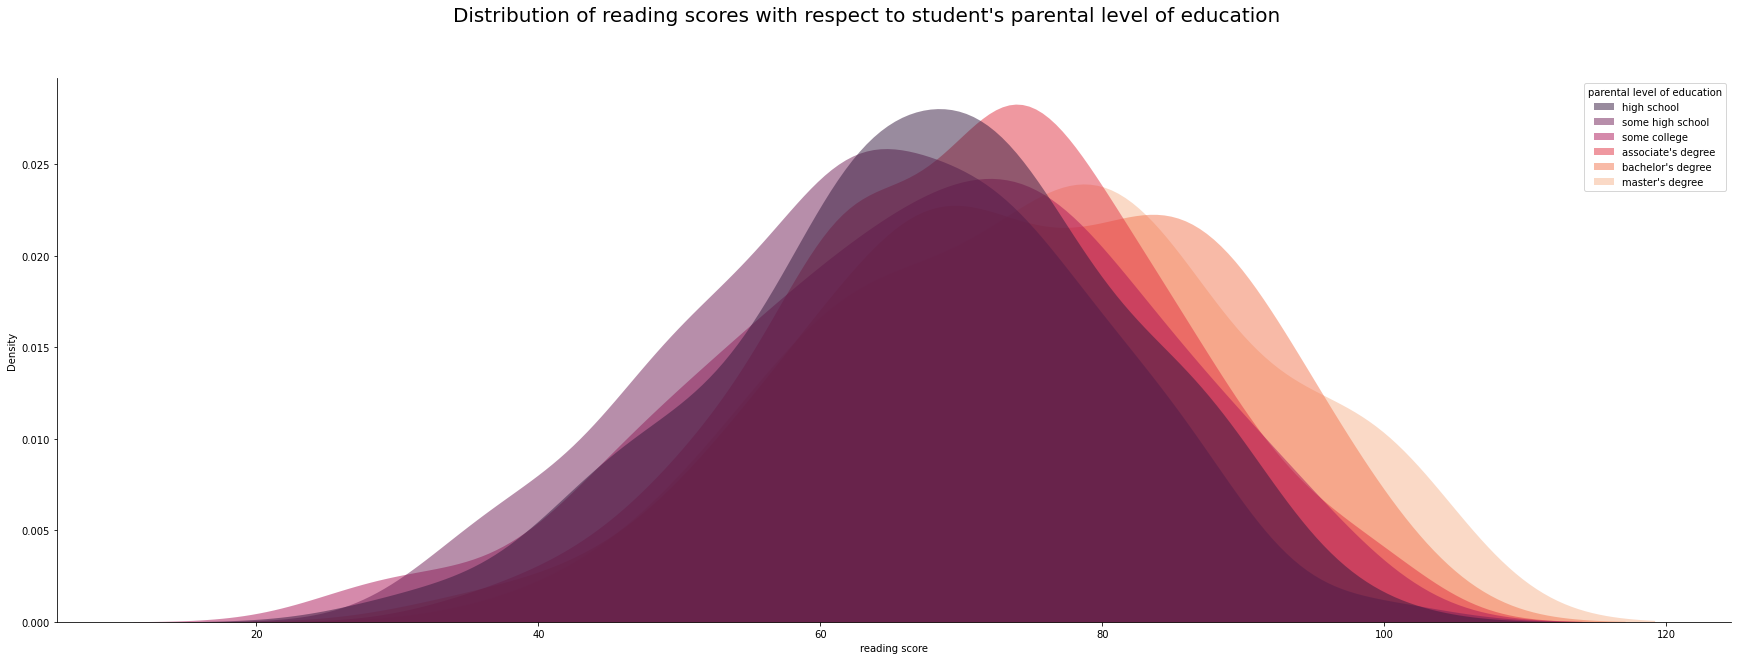

In [14]:
#create graph
plt.figure(figsize= (30,10))
sns.kdeplot(x ="reading score", data = df, hue ="parental level of education",  fill=True, common_norm=False, palette = "rocket",
   alpha=.5, linewidth=0,)

sns.despine(top = True, right = True, left = False, bottom = False)
plt.suptitle("Distribution of reading scores with respect to student's parental level of education", fontsize = 20)

plt.show()

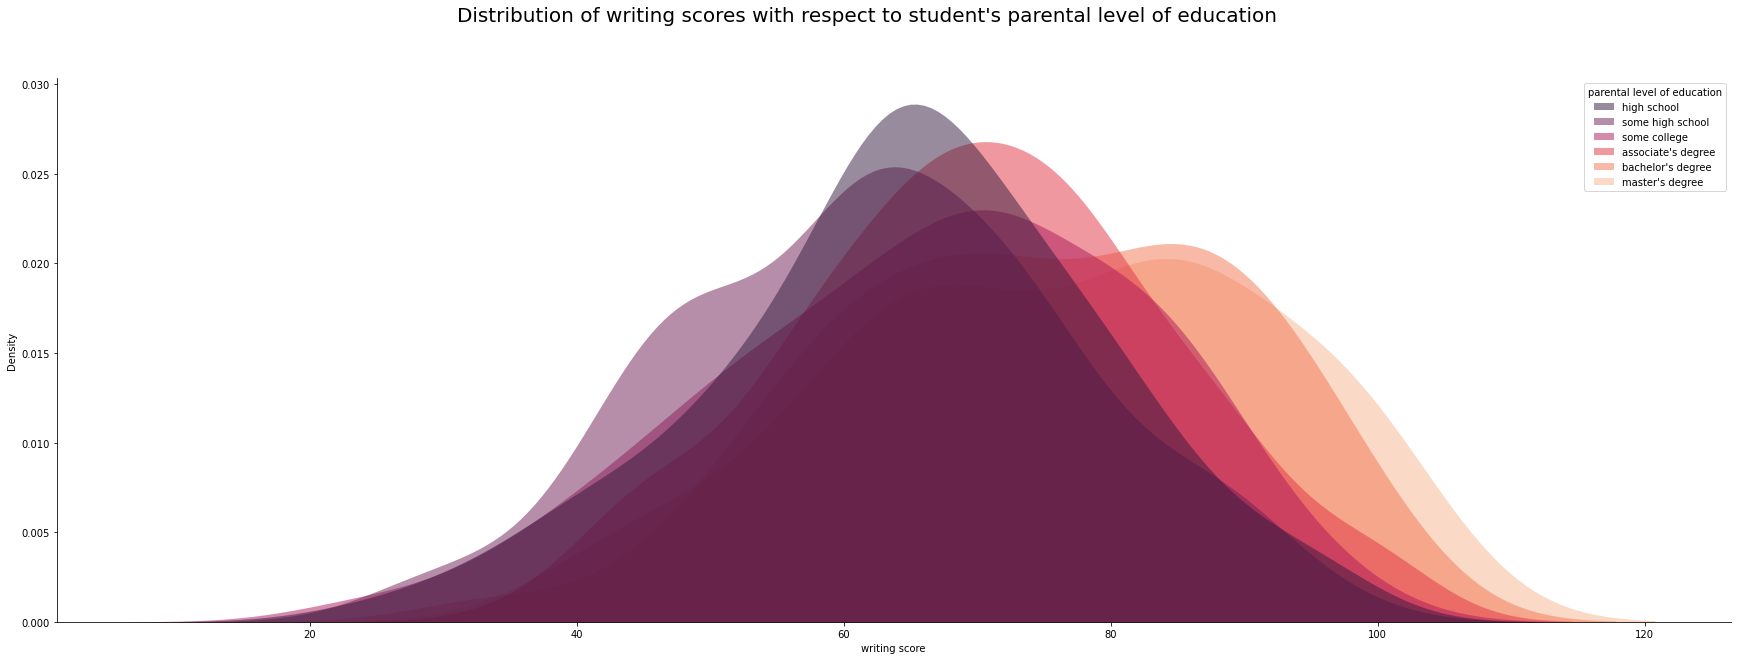

In [15]:
#create graph
plt.figure(figsize= (30,10))
sns.kdeplot(x ="writing score", data = df, hue ="parental level of education",  fill=True, common_norm=False, palette = "rocket",
   alpha=.5, linewidth=0,)

sns.despine(top = True, right = True, left = False, bottom = False)
plt.suptitle("Distribution of writing scores with respect to student's parental level of education", fontsize = 20)

plt.show()

In [16]:
# create graph
fig = px.scatter_3d(df, x = "math score", y = "reading score", z ="writing score", color = "parental level of education", template  = "plotly_white",opacity=0.5, size_max=18, color_discrete_sequence=px.colors.qualitative.D3)

# format graph
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

## Lunch 
For those from poorer householders are typically offered free/reduced lunch to ensure that children are freed adequately regardless of their circumstance. In this dataset, such student accounts for 34.8% of the dataset. 

The impact of this factor on the three variables is as follows: 

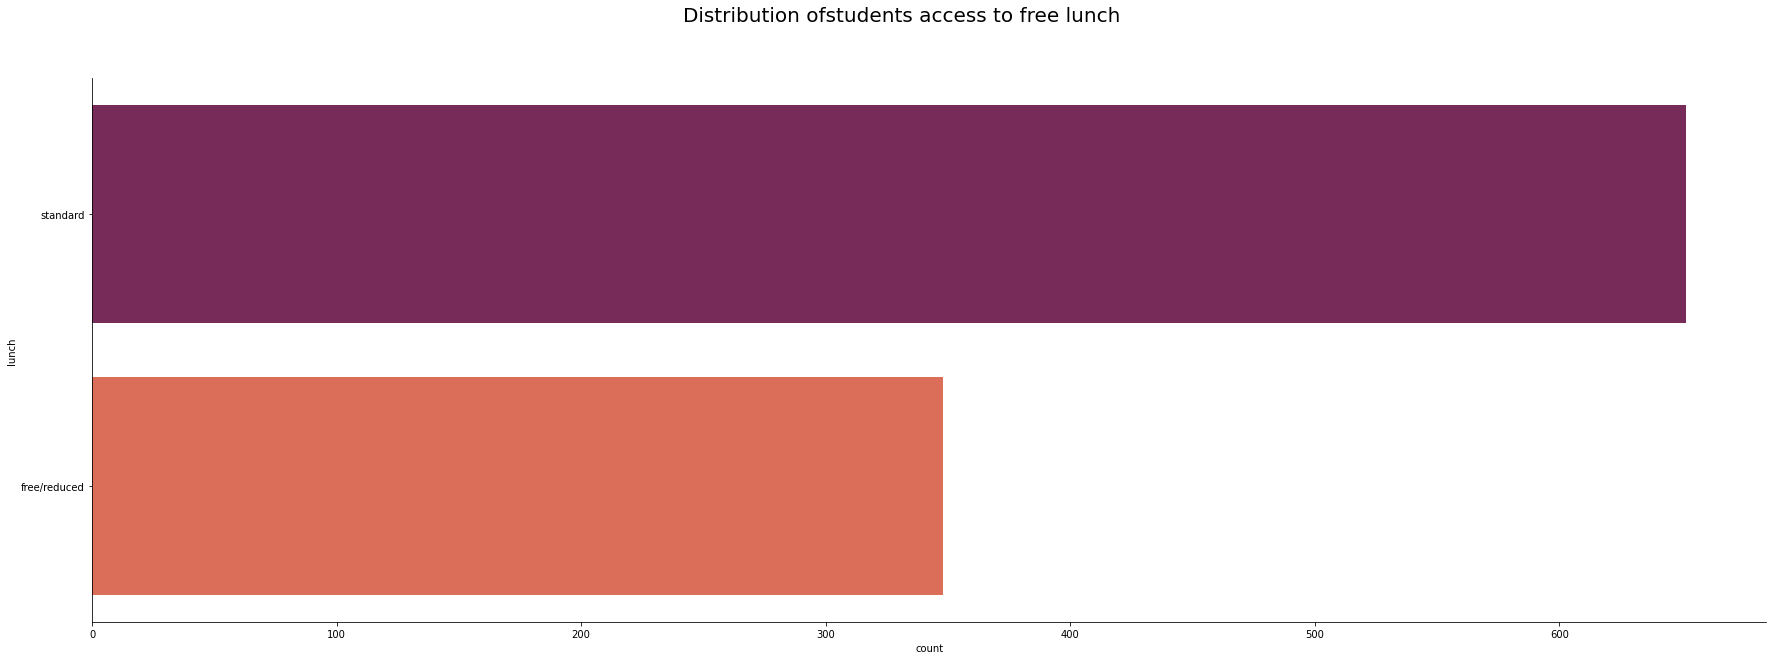

In [17]:
#create graph
plt.figure(figsize= (30,10))
sns.countplot(y= "lunch", data = df, palette = "rocket")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.suptitle("Distribution ofstudents access to free lunch", fontsize = 20)

plt.show()

In [18]:
(df[df["lunch"]=="free/reduced"].shape[0]/df.shape[0])*100

34.8

This graphic highlights that those who received free or reduced cost lunches achieved lower exam scores. As with other scores, this is a commonly seen in the wider world as one report states: 
> "Those who rarely ate breakfast scored on average 10.25 points lower than those who frequently ate breakfast, a difference of nearly two grades, after accounting for other important factors including socio-economic status, ethnicity, age, sex and BMI." ([University of Leeds, 2019](https://www.leeds.ac.uk/news-health/news/article/4500/skipping-breakfast-linked-to-lower-gcse-grades))

In [19]:
# create graph
fig = px.scatter_3d(df, x = "math score", y = "reading score", z ="writing score", color = "lunch", template  = "plotly_white",opacity=0.5, size_max=18,color_discrete_sequence=px.colors.qualitative.D3)

# format graph
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

## Test preparations 
Test preparations are frequently viewed as a means to improve exam results. In this dataset, 33% of students attended such courses. It is unclear if these were offered by the schools or were undertaken as part of extra curriculum activities instigated by the students and their parents. In the case of the later, it should be acknowledged that this undermines the effectiveness of using exam results as an evaluation of the teacher's capability as external teaching informed the capabilities or lack of, of the said teacher. 

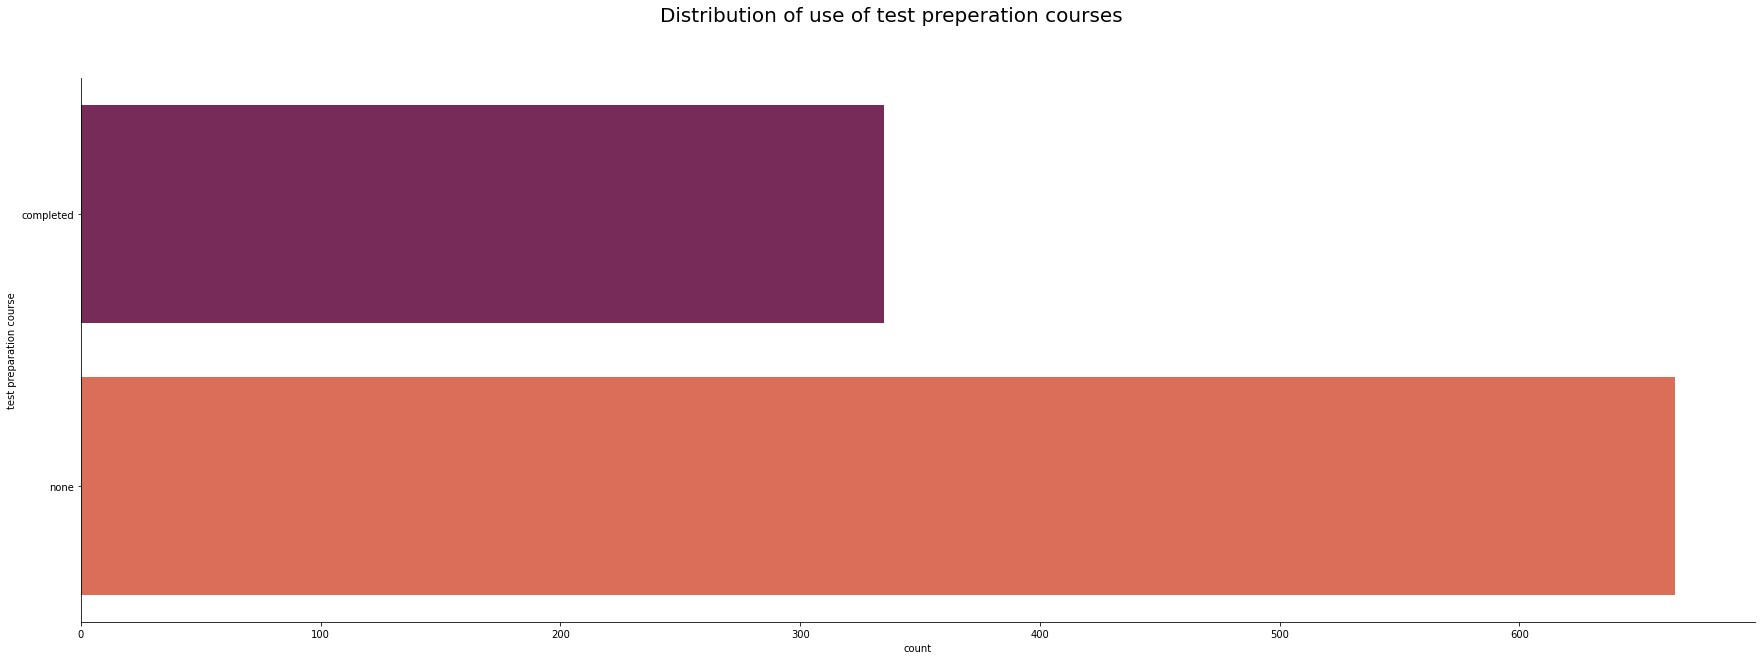

In [20]:
#create graph
plt.figure(figsize= (30,10))
sns.countplot(y= "test preparation course", data = df, palette = "rocket")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.suptitle("Distribution of use of test preperation courses", fontsize = 20)

plt.show()

In [21]:
(df[df["test preparation course"]=="completed"].shape[0]/df.shape[0])*100

33.5

In terms of the exam results, the differentiator is limited but in aspects such as writing, there appears to be some benefits. One reasoning may be that unlike maths or reading where the right answer is preestablished, in the cause of writing, there is creativity but also set rules which the student needs to understand. In this case, extra courses can aid the performance of students. 

In [22]:
# create graph
fig = px.scatter_3d(df, x = "math score", y = "reading score", z ="writing score", color = "test preparation course", template  = "plotly_white",opacity=0.5, size_max=18, color_discrete_sequence=px.colors.qualitative.D3)

# format graph
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

# Anomaly Detection 
Anomalies can be detected in several methods. One simple method is to explore outliers through the use of boxplots. These review each factor individually and examine particularly high or low values from the average. This indicate a few particularly low values. 

Whilst this method is easy to enact, it takes into account no information about other variables or how the exam results interact with one another. 

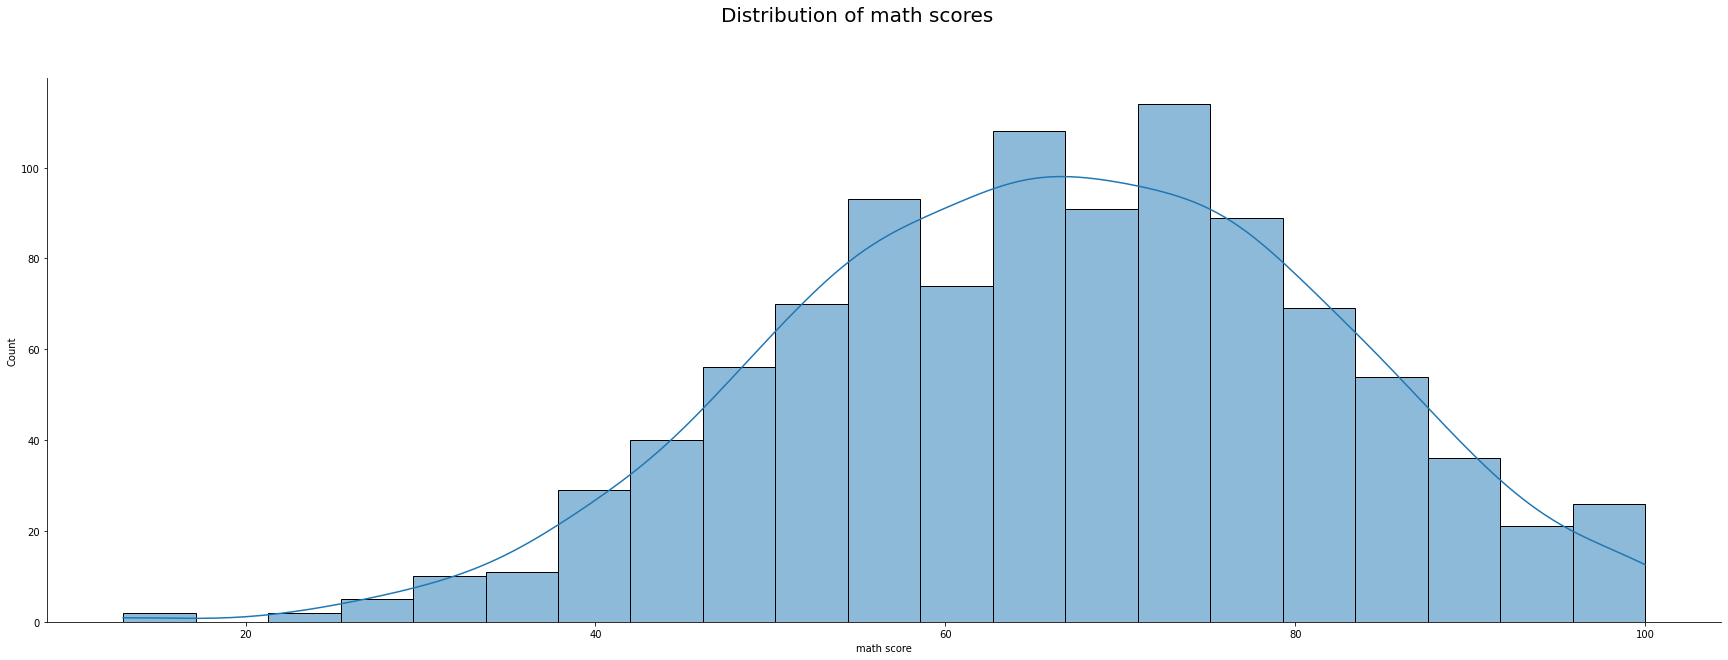

In [23]:
#create graph
plt.figure(figsize= (30,10))
sns.histplot(x = "math score", data = df, kde = True, )
sns.despine(top = True, right = True, left = False, bottom = False)

plt.suptitle("Distribution of math scores", fontsize = 20)

plt.show()

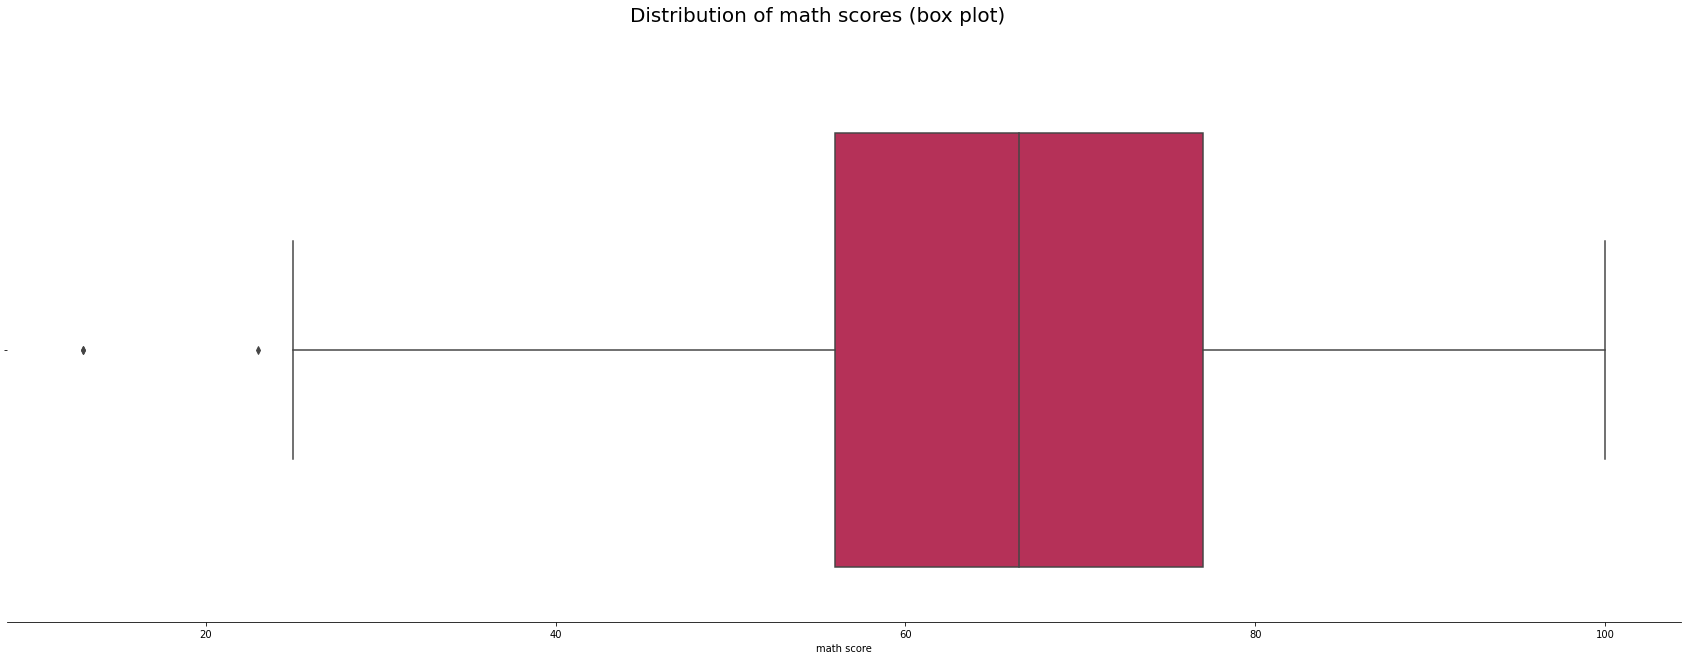

In [24]:
#create graph
plt.figure(figsize= (30,10))
sns.boxplot(x = "math score", data = df, palette = "rocket")
sns.despine(top = True, right = True, left = True, bottom = False)

plt.suptitle("Distribution of math scores (box plot)", fontsize = 20)
plt.show()

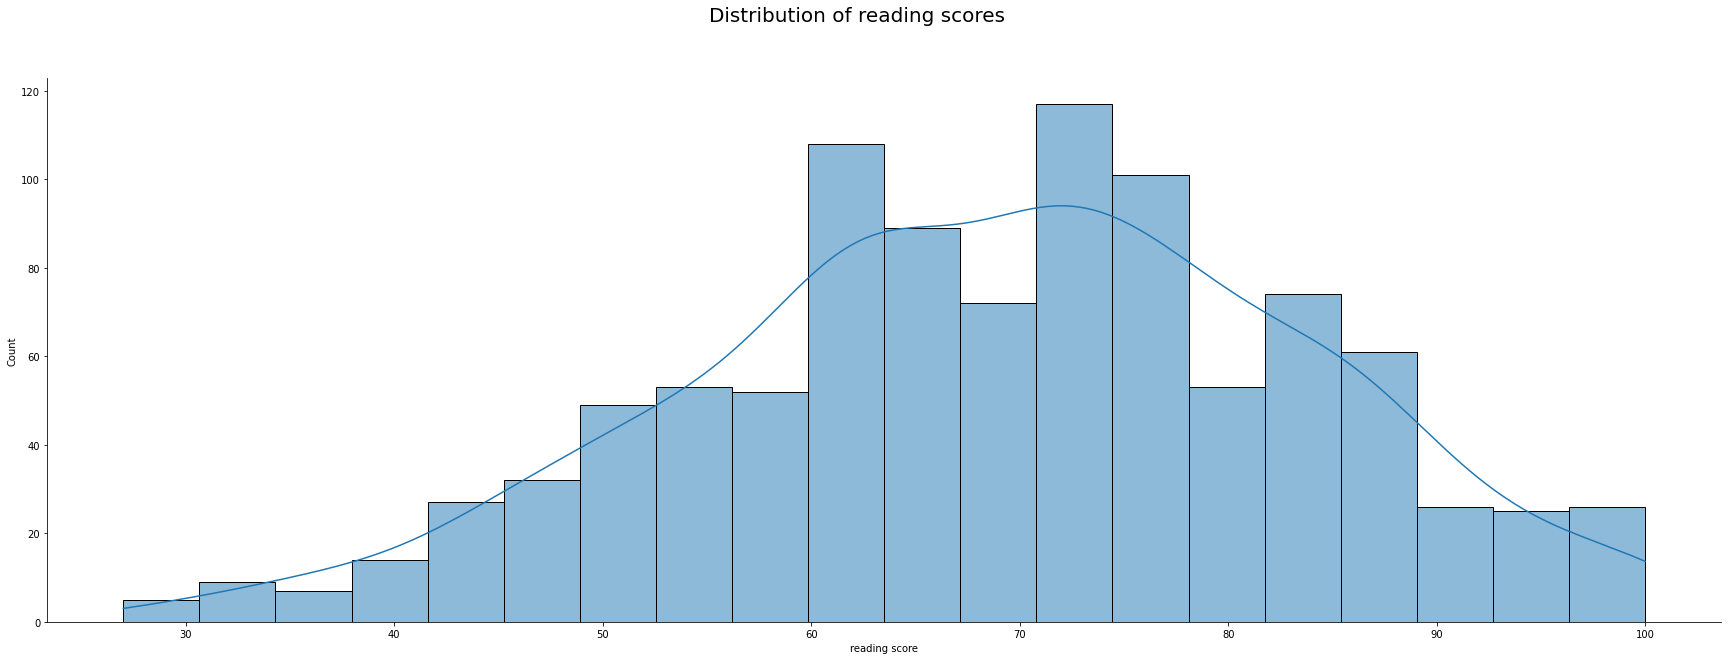

In [25]:
#create graph
plt.figure(figsize= (30,10))
sns.histplot(x = "reading score", data = df, kde = True,)
sns.despine(top = True, right = True, left = False, bottom = False)

plt.suptitle("Distribution of reading scores", fontsize = 20)

plt.show()

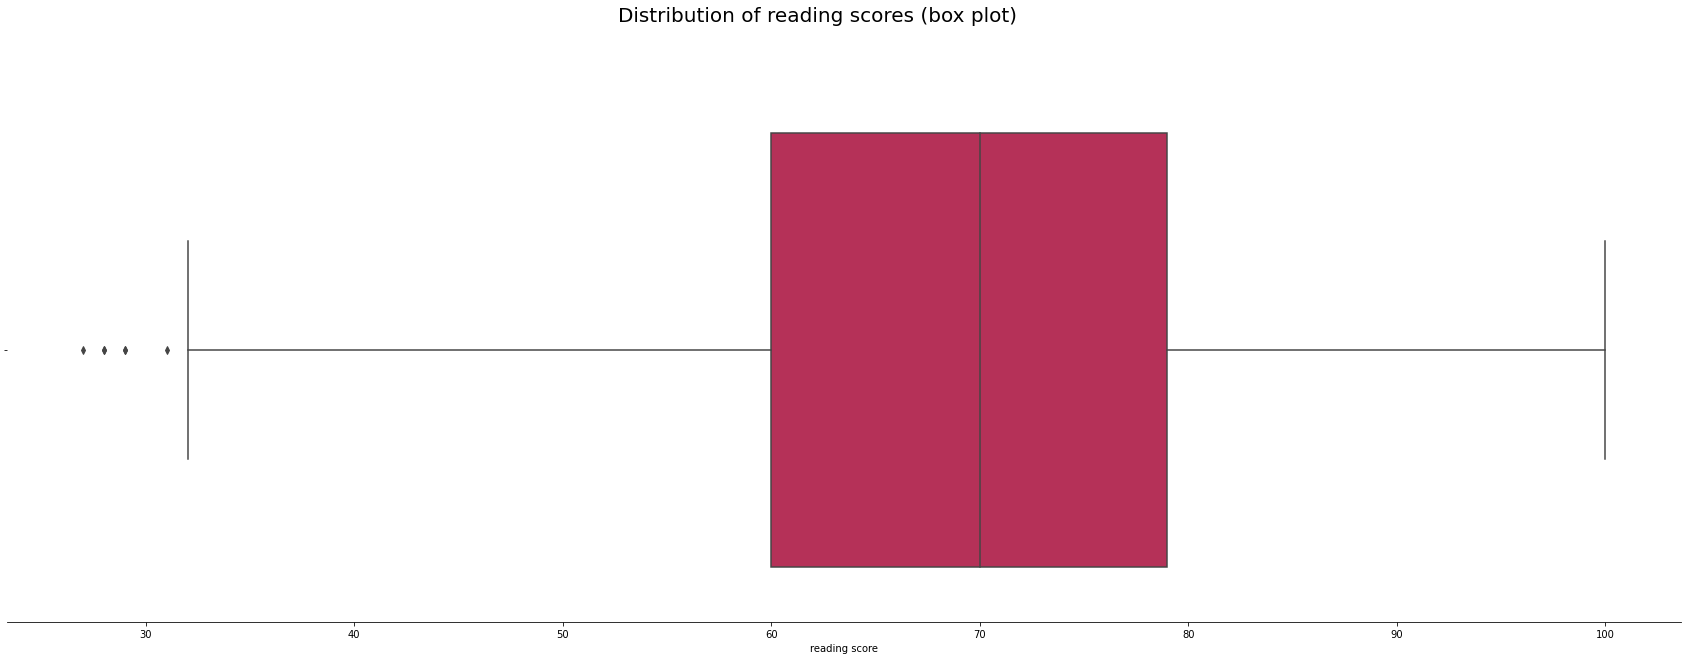

In [26]:
#create graph
plt.figure(figsize= (30,10))
sns.boxplot(x = "reading score", data = df, palette = "rocket")
sns.despine(top = True, right = True, left = True, bottom = False)

plt.suptitle("Distribution of reading scores (box plot)", fontsize = 20)
plt.show()

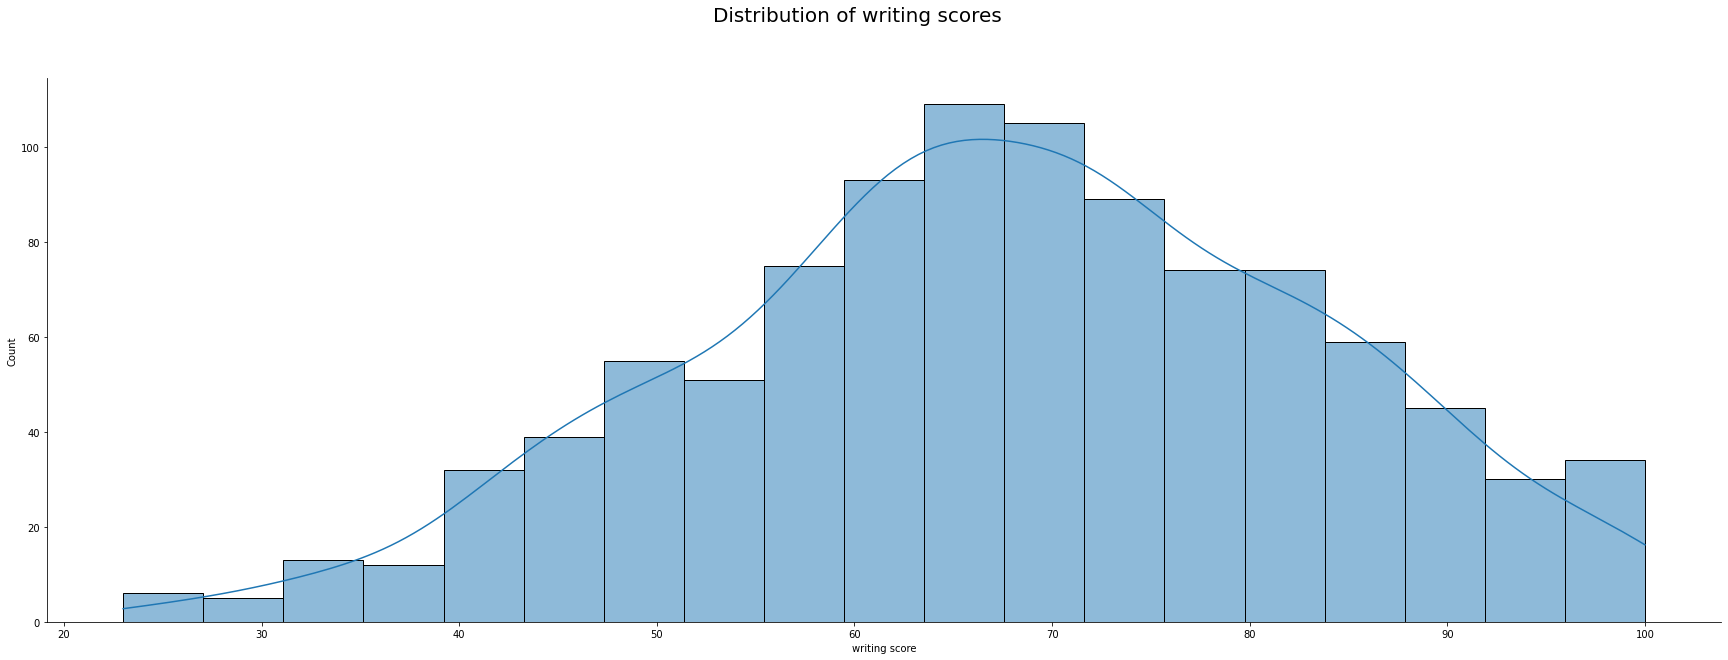

In [27]:
#create graph
plt.figure(figsize= (30,10))
sns.histplot(x = "writing score", data = df, kde = True, )
sns.despine(top = True, right = True, left = False, bottom = False)

plt.suptitle("Distribution of writing scores", fontsize = 20)
plt.show()

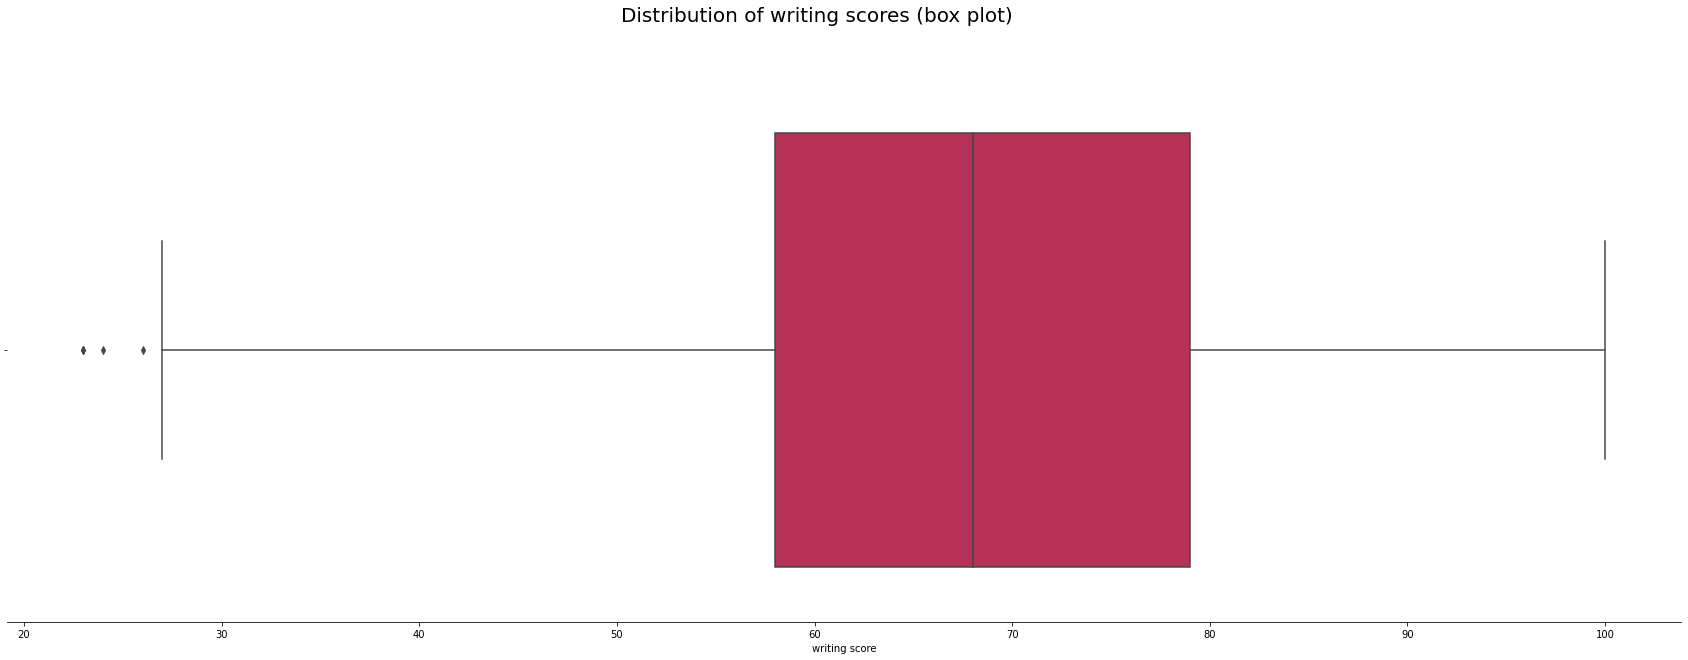

In [28]:
#create graph
plt.figure(figsize= (30,10))
sns.boxplot(x = "writing score", data = df, palette = "rocket")
sns.despine(top = True, right = True, left = True, bottom = False)
plt.suptitle("Distribution of writing scores (box plot)", fontsize = 20)
plt.show()

In [29]:
# create graph
fig = px.scatter_3d(df, x = "math score", y = "reading score", z ="writing score", template  = "plotly_white",opacity=0.5, size_max=18,color_discrete_sequence=px.colors.qualitative.D3)

# format graph
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

## KMeans 
Given the multi-linear relationship between the reading, writing and math scores, anomalies be more effective if it took into account all three variables. For this, methods such as KMeans could be utilised. 

For the purpose of this project, the method highlighted by DecisionForest on YouTube ([2020](https://youtu.be/d8fsm3qnvPc)) will be used. 

In [30]:
# method from https://youtu.be/d8fsm3qnvPc 

# import libraries
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [31]:
# process dataset 
features = ['math score', 'reading score','writing score']
df_kmeans = df.copy()
data = df_kmeans[features].copy()
data = data.values

In [32]:
# scale data
scaler = StandardScaler()
data = scaler.fit_transform(data)

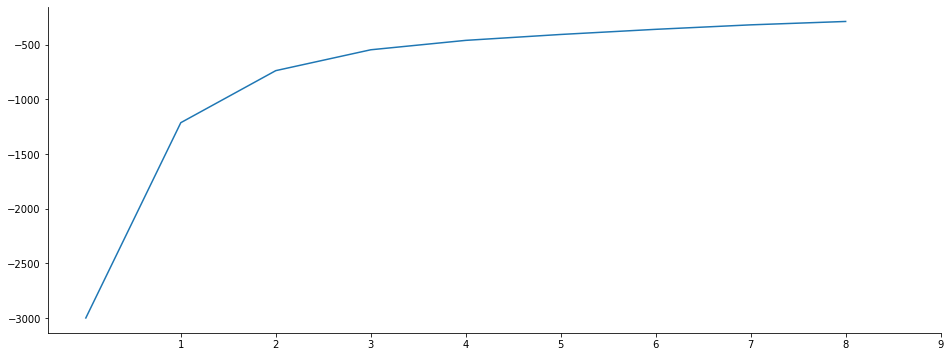

In [33]:
# run KMeans
n_cluster = range(1,10)

kmeans =[KMeans(n_clusters =i).fit(data) for i in n_cluster]
scores = [kmeans[i].score(data) for i in range(len(kmeans))]

#create graph
f =plt.figure(1, figsize =(16,6))
plt.plot(scores)
_= plt.xticks(n_cluster)


sns.despine(top = True, right = True, left = False, bottom = False)

plt.show()

Clustering the data for all three variables, there are 6 ideal clusters. This includes a cluster with the lowest number of individuals, 85, and therefore may be a point of interest. Graphically, these belong to individuals who performed poorly in exams. 

In [34]:
# find ideal no. of clusters
scores =np.array(scores)
dif_scores = scores/scores[0]
dif_scores =np.diff(dif_scores)
n_clusters = np.argwhere(dif_scores <np.quantile(dif_scores, 0.9))[-1][0]

print(n_clusters)

6


In [35]:
# predict clusters
preds = KMeans(n_clusters = n_clusters).fit_predict(data)
print(preds[0])

0


In [36]:
# list cluster numbers to dataframe 
df_kmeans = pd.DataFrame(df_kmeans)
df_kmeans["cluster"] = preds

outliers = [
    x
    for x in zip(
    df_kmeans["cluster"].value_counts().iloc[-2:].index,
    df_kmeans["cluster"].value_counts().iloc[-2:].values)
]

In [37]:
# clusters and number of items in each clusters
df_kmeans["cluster"].value_counts()

0    259
3    222
1    187
2    159
4    120
5     53
Name: cluster, dtype: int64

In [38]:
# view new dataset
df_kmeans.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,cluster
0,male,group A,high school,standard,completed,67,67,63,0
1,female,group D,some high school,free/reduced,none,40,59,55,2
2,male,group E,some college,free/reduced,none,59,60,50,2
3,male,group B,high school,standard,none,77,78,68,3
4,male,group E,associate's degree,standard,completed,78,73,68,3


This could be used to identify students who require additional support but may be limited in identifying anomalies caused by teachers manipulating the data. 

In [39]:
# create graph
fig = px.scatter_3d(df_kmeans, x = "math score", y = "reading score", z ="writing score", color = "cluster", template  = "plotly_white",opacity=0.5, size_max=18,color_continuous_scale=px.colors.sequential.Sunsetdark)

# format graph
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

## Isolation Forest
An alternative method is to use Isolation Forest to identify anomalies in the dataset. Due to the underlying algorithm, it does not require scaling and can utilise categorical data such as race. Once again the method by DecisionForest on YouTube ([2020](https://www.youtube.com/watch?v=TP3wdwD8JVY&t=44s)) will be used. 

In [40]:
#method from https://www.youtube.com/watch?v=TP3wdwD8JVY&t=44s

#import library
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import IsolationForest

In [41]:
# duplicate dataset
data = df.copy()

# encord catorgical columns
for col in data.columns: 
    if data[col].dtype =="object": 
        le = LabelEncoder()
        le.fit(list(data[col].astype(str).values))
        data[col]=le.transform(list(data[col].astype(str).values))
    

In [42]:
# view revised dataset
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,1,0,2,1,0,67,67,63
1,0,3,5,0,1,40,59,55
2,1,4,4,0,1,59,60,50
3,1,1,2,1,1,77,78,68
4,1,4,0,1,0,78,73,68


There is a prerequisite to understand the level of contamination, which can be done with the support of an individual with domain knowledge. However, assuming that there is 10% contamination, the dataset highlights possible anomalies as follows. 

In [43]:
# run algorithem
model = IsolationForest(contamination = 0.1, n_estimators=500)
model.fit(data.values)

IsolationForest(contamination=0.1, n_estimators=500)

In [44]:
# add iforest results to dataframe
data["iforest"] = pd.Series(model.predict(data.values))
data["iforest"]  = data["iforest"].map({1:0, -1:1})
print(data["iforest"].value_counts())

df["iforest"] = data["iforest"]

0    900
1    100
Name: iforest, dtype: int64


As with other models, the results of under achieving students are highlighted prominently. Equality over achievers are also highlighted. However, there is also a handful of individuals in the centre of the dataset that are also highlighted as anomalies. These may be those students that over or under perform regardless of circumstance or received additional aid. In each case, additional investigation is required to understand the unique dynamics affecting the performance of such students.

In [45]:
# create graph
fig = px.scatter_3d(data, x = "math score", y = "reading score", z ="writing score", color = "iforest", template  = "plotly_white",opacity=0.5, size_max=18,color_continuous_scale=px.colors.sequential.Sunsetdark)

# format graph
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

In [46]:
#view datset 
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,iforest
0,male,group A,high school,standard,completed,67,67,63,0
1,female,group D,some high school,free/reduced,none,40,59,55,0
2,male,group E,some college,free/reduced,none,59,60,50,0
3,male,group B,high school,standard,none,77,78,68,0
4,male,group E,associate's degree,standard,completed,78,73,68,0


# Conclusion

The use of unsupervised learning algorithm can yield key insights into data which may not be apparent before. In terms of exams, these can highlight not only students that over or under perform but also highlight students whose data is skewed, perhaps by unethical acts by those in authority. 

This can have wider implications on the student as well as society. Those who attended universities following teacher interference, may struggle to keep up with demands. Likewise, students who lost their chance to attend the university as a result, their contributions to society may be hampered.  Subsequently, machine learning and data science plays a key role in ensuring that students are not exploited in such a manner. Society and authorities must ensure that at the centre of education and in turn exam is the students and their wellbeing now and in the future. 
